# 6. Internal dynamic factor

Based on:

[1] ISO 6336-1:2006 Calculation of load capacity of spur and helical gears -- Part 1: Basic principles, introduction and general influence factors

In [34]:
from sympy import *
from matplotlib import pyplot
from numpy import arange, array
init_printing()

def symb(x, y, z = ''):
    return symbols('{0}_{1}{2}'.format(x, y, z), type = float)

### 6.4.2 Method B -- Factor $K_{v-B}$
This method is not recommended if:
\begin{align}
    \frac{v z_1}{100} \sqrt{u^2/(1 + u^2)} < 3 \mathrm{m/s}
\end{align}

## 6.5 Determination using Method B
### 6.5.3 Resonance running speed:
It is given by:

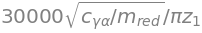

In [28]:
u, z1, cga, mRed = symbols('u z_1 c_gamma_alpha m_red')
eq6 = 30000/(pi*z1)*sqrt(cga/mRed) # n_E1
eq6

where $m_{red}$ is the relative mass of a gear pair, i.e. of(?) the mass per face width of each gear, referred to its base radius or to the line of action. It is equal to:

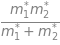

In [29]:
eq7 = symb('m',1,'^*')*symb('m',2,'^*')/(symb('m',1,'^*') + symb('m',2,'^*'))
eq7

The resonance ratio is the ratio of pinion speed to resonance speed, and it given by:

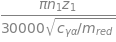

In [30]:
simplify(symb('n', 1)/eq6)

Text(0, 0.5, 'Resonance ratio, [-]')

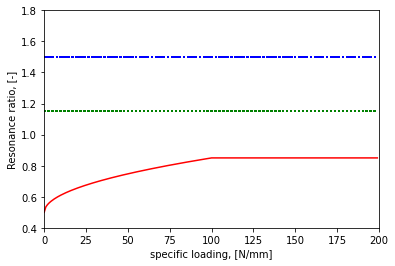

In [43]:
NS = lambda x: (0.85 if (x >= 100) else 0.5 + 0.35*sqrt(x/100))
X = arange(0, 200.0)
Y = array([NS(x) for x in X])
pyplot.plot(X, Y, 'r-')
pyplot.plot(X,1.15*ones(len(X)), 'g:')
pyplot.plot(X,1.50*ones(len(X)), 'b-.')
pyplot.axis([0, 200, 0.4, 1.8])
pyplot.xlabel('specific loading, [N/mm]')
pyplot.ylabel('Resonance ratio, [-]')

### 6.5.8 Resonance speed for specific gear designs
#### 6.5.8.4 Planetary gears
See also 6.4.2

a) Ring gear connected to the case:

### 6.5.9 
valid for gear pais with external teeth: spur, single and double helical. 

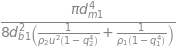

In [19]:
dm1, db1, rho1, q1, rho2, q2, rho = symbols('d_m1 d_b1 rho_1 q_1 rho_2 q_2 rho')
eq30r = dm1**2/(1/(rho1*(1 - q1**4)) + 1/(rho2*(1 - q2**4)*u**2))
eq30l = (pi/8)*(dm1/db1)**2
eq30 = eq30l*eq30r
eq30

for pinions and wheels of solid construction: $q_1 = q_2 = 0$.

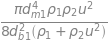

In [20]:
eq30 = eq30.subs([(q1, 0), (q2,0)])
simplify(eq30)

Considering that the gears have the same density, leads to:

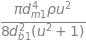

In [21]:
eq30 = eq30.subs([(rho1, rho), (rho2, rho)])
simplify(eq30)

Notice that altough this expression represents the reduced mass of a gear pair, it does not has units of mass.